In [1608]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1609]:
import pandas as pd
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import MultiLabelBinarizer 
import plotly.graph_objs as go

In [1610]:
# Este dataset contiene algunas de las películas y shows que había en netflix a mediados de 2021.
# https://www.kaggle.com/shivamb/netflix-shows

# El significado de cada una de sus columnas es:
#  show_id = id del show o la película
#  type = si es un show o una película
#  title = nombre del show o la película
#  director = director
#  cast = casting del show o a película
#  country = país donde fue producido
#  date_added = cuando fue añadido a netflix
#  release_year = año de cuando fue rodado
#  rating = rango de edad para la que es apto
#  duration = duración
#  listed_in = a que categoría pertenece
#  description = descripción

In [1611]:
# Cargamos el dataset
netflix = pd.read_csv("/content/drive/MyDrive/COLAB/BDA/EDA/netflix_titles.csv")

In [1612]:
# Vamos a ver algunos datos
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [1613]:
# Ahora veremos el tamaño del dataset
netflix.shape

(8807, 12)

In [1614]:
# Este dataset cuenta con 8807 filas y 11 columnas

In [1615]:
# Consultamos los tipos de datos y si hay o no valores nulos
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [1616]:
# Parece ser que algunas columnas tienes valores nulos, y que la columna del director es la que más tiene
# La única columna numérica, tal y como se esperaba al ojear el dataset, es la del año de rodaje

In [1617]:
# Antes de empezar a mostrar las gráficas procederemos a tratar los valores nulos

In [1618]:
# Ahora vamos a ver el número de valores nulos que hay por columna

In [1619]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [1620]:
# Vamos a ver de una manera más concreta lo que afecta al dataset el número de valores nulos
total = netflix.isnull().sum().sort_values(ascending = False)
percent = (netflix.isnull().sum()/netflix.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


In [1621]:
# Parece que las columnas del director, el país y el casting son las que más valores nulos tienen
# Las demás columnas tienen un número tan insignificante de valores nulos que se podrían eliminar directamente las filas

In [1622]:
# En el caso de las columnas antes mencionadas se podría sustituir ese valor nulo por algún otro valor de nuestra elección
netflix["country"].fillna("unknown_country", inplace=True)
netflix["cast"].fillna("unknown_cast", inplace=True)
netflix["director"].fillna("unknown_director", inplace=True)

In [1623]:
# En el caso de las demás columnas con valores nulos podemos eliminar directamente las filas

In [1624]:
netflix.dropna(inplace=True)
netflix=netflix.reset_index()
netflix = netflix.drop(['index'], axis=1)

In [1625]:
# Ahora veremos otra vez el tamaño del dataset

In [1626]:
netflix.shape

(8790, 12)

In [1627]:
# Ahora veremos si el dataset cuenta con alguna fila duplicada
print(f'Total de filas duplicadas: {netflix.duplicated().sum()}')

Total de filas duplicadas: 0


In [1628]:
# Se han acabado eliminando 17 filas.

In [1629]:
# Vamos a ver los valores únicos que contiene la columna de rating

In [1630]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [1631]:
# Estos ratings no se entienden muy bien por lo tanto podríamos cambiarlos

In [1632]:
netflix['rating'] = netflix['rating'].replace({
                'PG-13': 'Niños mayores de 12',
                'TV-MA': 'Adultos',
                'PG': 'Niños bajo supervisión',
                'TV-14': 'Niños mayores de 14',
                'TV-PG': 'Niños bajo supervisión',
                'TV-Y': 'Niños',
                'TV-Y7': 'Niños mayores de 7',
                'R': 'Adultos',
                'TV-G': 'Niños',
                 'G': 'Niños',
                'NC-17': 'Adultos',
                'NR': 'NR',
                'UR' : 'UR'
                })

In [1633]:
# Ahora podríamos guardar el dataset limpio

In [1634]:
netflix.to_csv('netflix_cleaned.csv',index=False)

In [1635]:
# Ahora vamos a ver algunos datos de interés de las columnas numéricas como categóricas
netflix.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8790,8790,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8790,2,Movie,6126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8790,8790,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8790,4527,unknown_director,2621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8790,7679,unknown_cast,825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8790,749,United States,2809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8790,1765,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8790.0,NaN,NaN,NaN,2014.183163,8.825466,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8790,9,Adultos,4007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8790,220,1 Season,1791,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1636]:
# Insight: Parece que hay algunas descripciones que se repiten, luego veremos a que es debido.

In [1637]:
# En esa tabla podemos ver los valores que más se repiten en las columnas categóricas y la cantidad de valores y valores únicos que tiene

In [1638]:
#Ahora mostraremos algunas gráficas de interés sobre este dataset

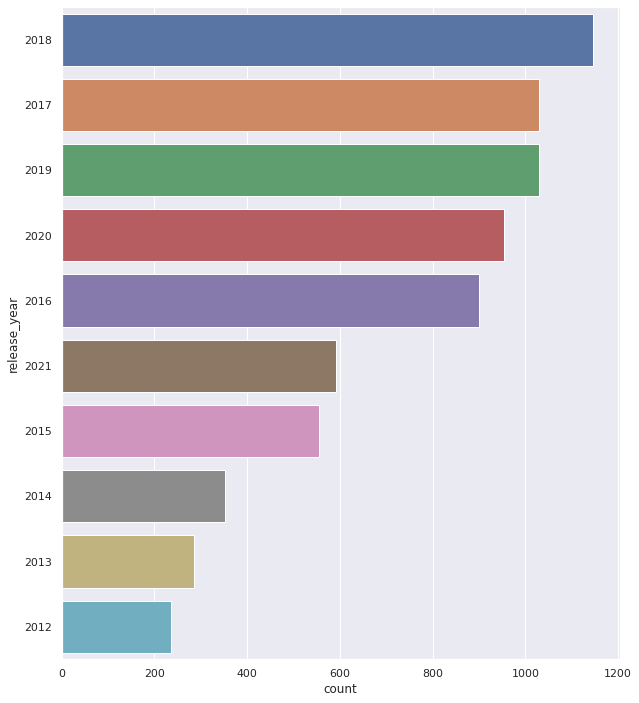

In [1639]:
# Ahora veremos los programas de los que mas año hay
plt.figure(figsize=(10,12))
sns.countplot(y="release_year",data=netflix,order=netflix["release_year"].value_counts().index[0:10])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



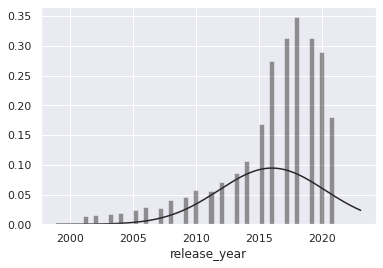

In [1640]:
from scipy.stats import norm

sns.distplot(netflix.loc[netflix['release_year'] > 2000, 'release_year'],fit= norm, kde=False,color='black')

In [1641]:
# Insight: ese aumento en la gráfica es debido a que netflix llegó a europa en 2013 y empezaron a hacer muchas más películas.

In [1642]:
# Parece que la mayoría de películas de netflix fueron hechas más recientemente y son principalmente del año 2016 en adelante

In [1643]:
pelis=netflix[netflix['type'] == 'Movie']
shows=netflix[netflix['type'] == 'TV Show']

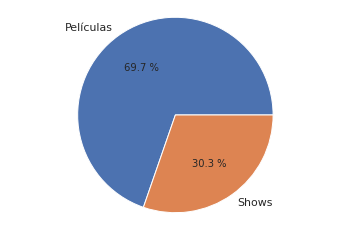

In [1644]:
# Ahora veremos una gráfica sobre el número de películas y TV Shows que hay en el catálogo de netflix
tipos = [len(pelis),len(shows)]
nombres = ["Películas","Shows"]
plt.pie(tipos, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [1645]:
print("Hay",len(pelis),"películas y",len(shows),"shows.")

Hay 6126 películas y 2664 shows.


In [1646]:
# La mayor parte del catálogo de netflix son películas

Text(0.5, 1.0, 'Distribución del catálogo por los años')

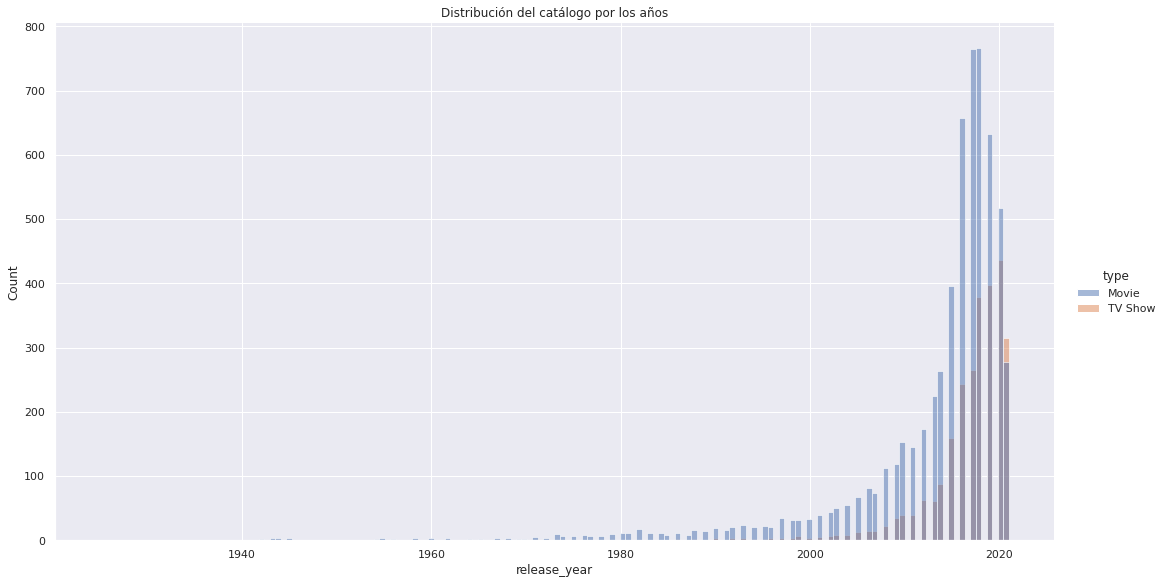

In [1647]:
sns.displot(data=netflix, x='release_year', hue='type',height=8, aspect=15/8,color="black")
plt.title('Distribución del catálogo por los años')

In [1648]:
# Vemos que siempre se añadieron más películas que TV Shows excepto en el último año

In [1649]:
netflix.rating.unique()

array(['Niños mayores de 12', 'Adultos', 'Niños bajo supervisión',
       'Niños mayores de 14', 'Niños', 'Niños mayores de 7', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

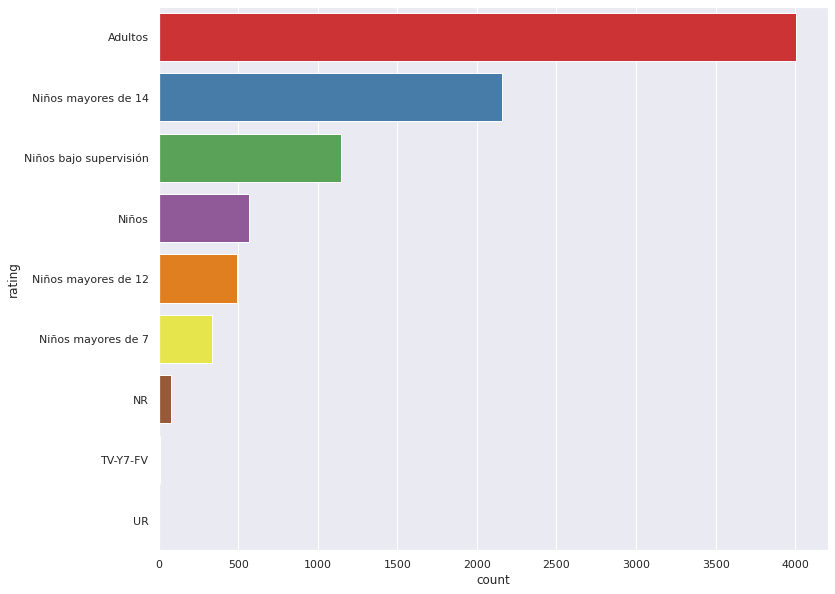

In [1650]:
# Ahora vamos a ver que ratings tienen la mayoría de las películas 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="rating", data=netflix, palette="Set1", order=netflix['rating'].value_counts().index[0:14])

In [1651]:
# Hay priincipalmente películas para adultos.

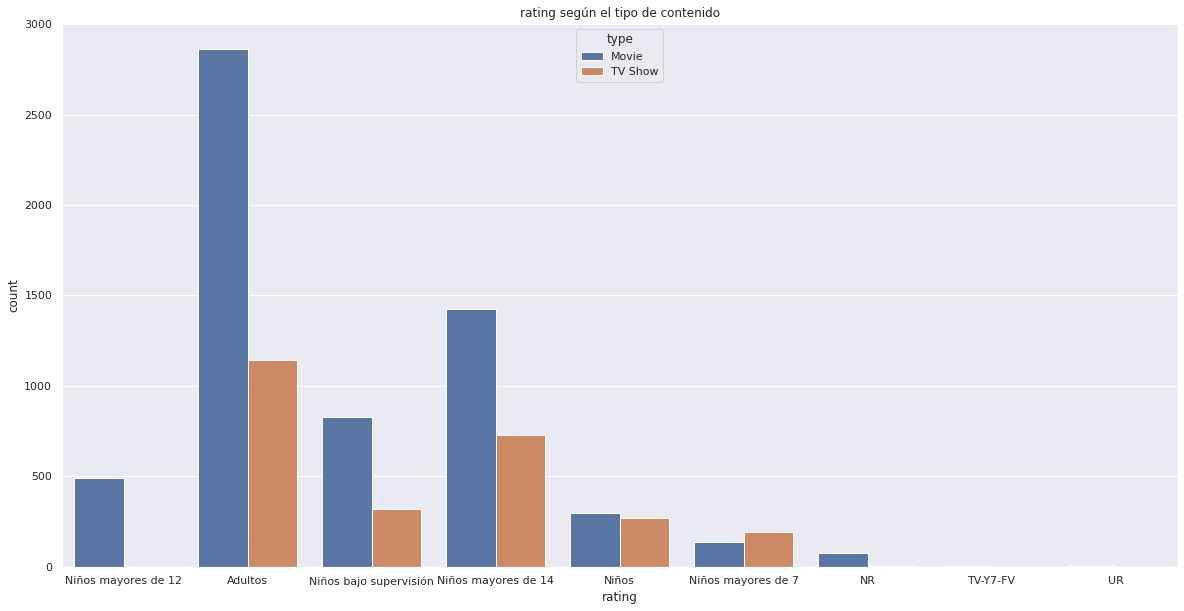

In [1652]:
plt.figure(figsize=(20,10))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('rating según el tipo de contenido')
plt.show()

In [1653]:
#Insight: Vemos que no hay show para niños mayores de 12 años

In [1654]:
# Vemos que el rating más repetido es el de adultos.

In [1655]:
#Ahora vamos a ver los meses cuando más y cuando menos contenido se añade a netflix

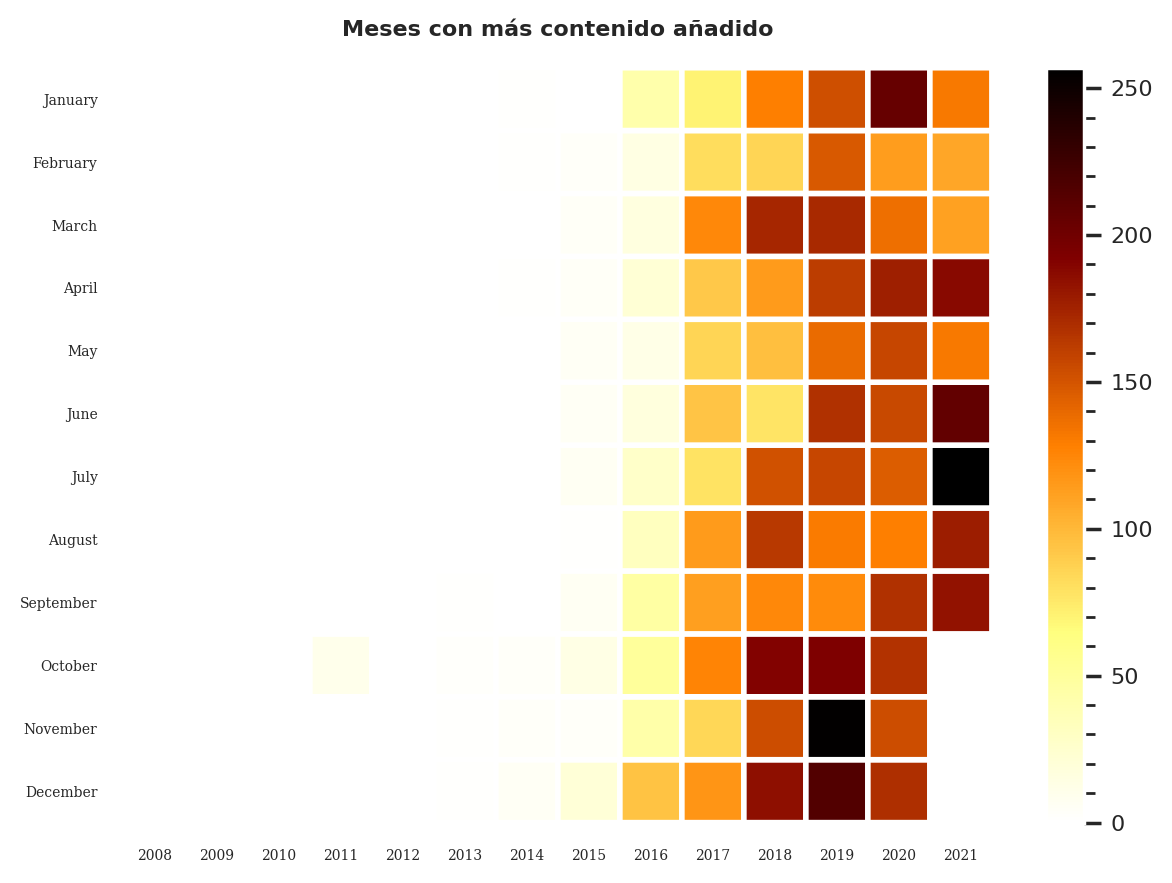

In [1656]:
# AMPLIACIÓN
netflix_date = netflix[['date_added']].dropna()
netflix_date['year'] = netflix['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(7, 5), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=5, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=5, fontfamily='serif')

plt.title('Meses con más contenido añadido', fontsize=8, fontfamily='calibri', fontweight='bold', position=(0.50, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [1657]:
# Insight: Los 2 meses donde más contenido se añadió al catálogo de betflix fueron noviembre de 2019 y julio de 2021

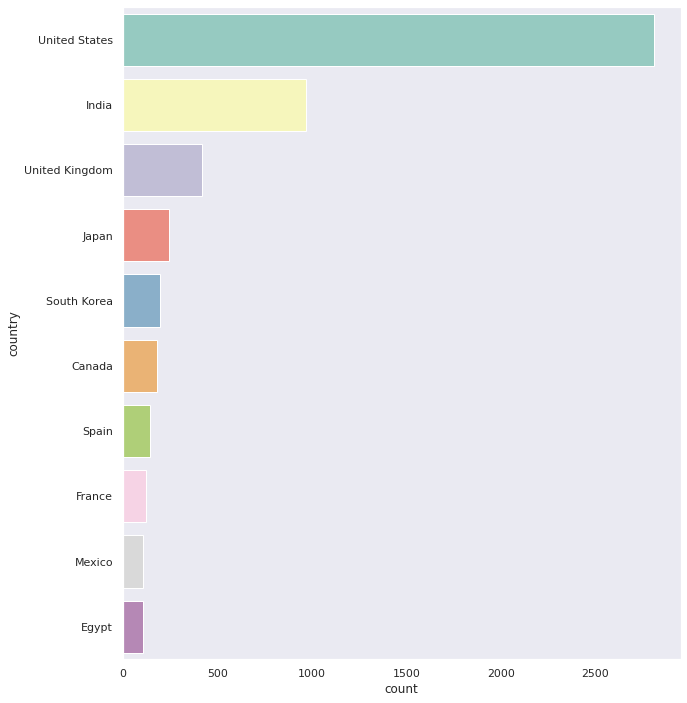

In [1658]:
# Ahora haremos el mismo tipo de gráfico solo que para los 10 países con más películas en la plataforma
paises=netflix[netflix['country'] != 'unknown_country']
plt.figure(figsize=(10,12))
sns.set(style="dark")
ax = sns.countplot(y="country", data=paises, palette="Set3", order=paises['country'].value_counts().index[0:10])

In [1659]:
# El país con más contenido, con diferencia, es Estados Unidos.

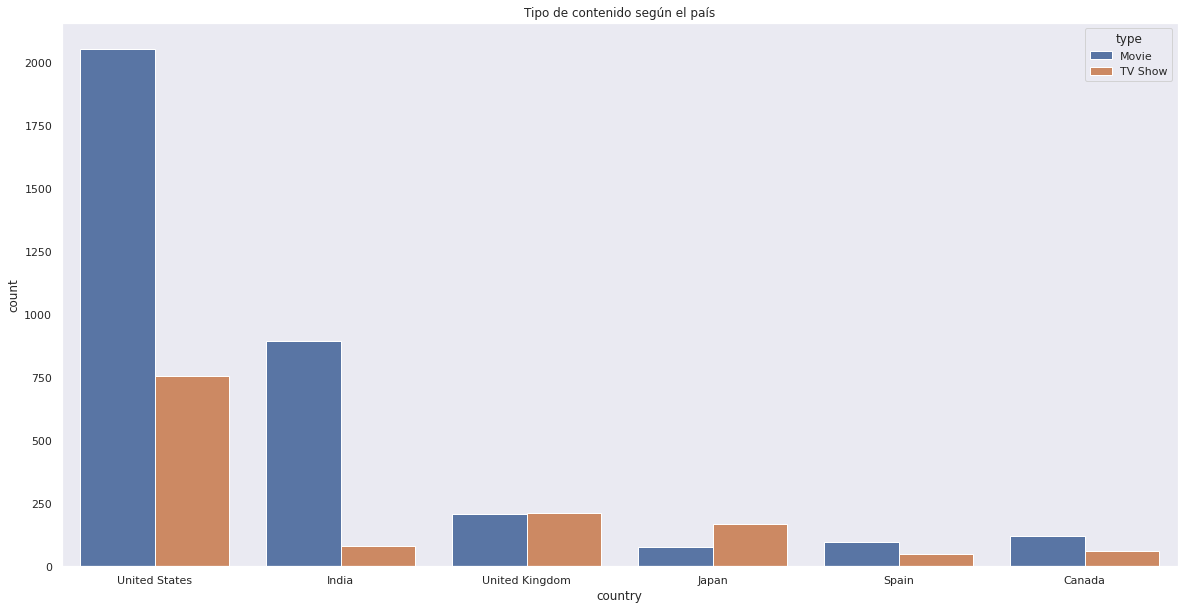

In [1660]:
top_productive_countries=netflix[(netflix['country']=='United States')|(netflix['country']=='India')|(netflix['country']=='United Kingdom')|(netflix['country']=='Japan')|
                             (netflix['country']=='Canada')|(netflix['country']=='Spain')]
plt.figure(figsize=(20,10))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('Tipo de contenido según el país')
plt.show()

In [1661]:
# Destaca el caso de que los japoneses tengan mas TV shows que películas

In [1662]:
# Los 3 países que cuentan con más contenido propio en la plataforma son Estados Unidos, India y Reino Unido.

In [1663]:
# Ahora veremos los directores con más películas o TV shows

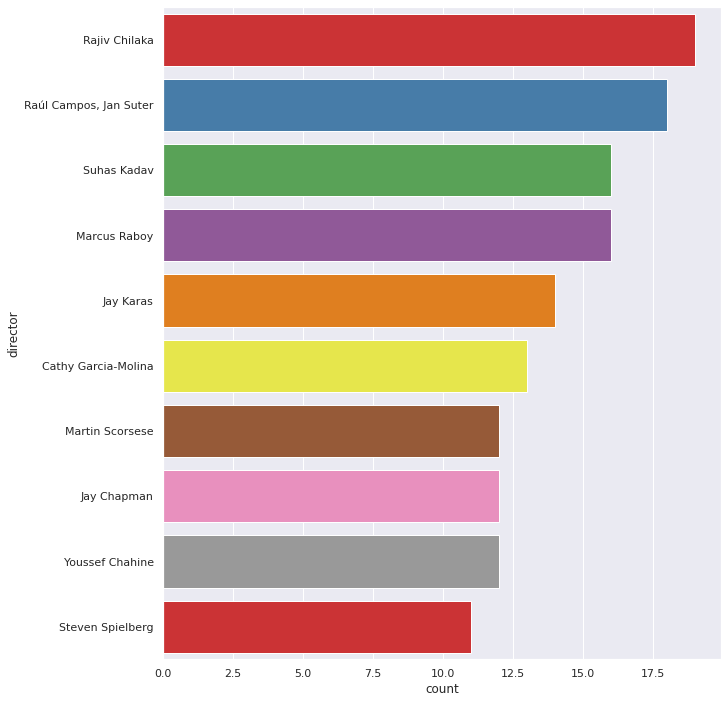

In [1664]:
plt.figure(figsize=(10,12))
sns.set(style="darkgrid")
ax = sns.countplot(y="director", data=netflix, palette="Set1", order=netflix['director'].value_counts().index[1:11])

In [1665]:
# El que más tiene es Rajiv Chilaka (animador indio)
# Los segundos son 2 productores latinoamericanos que siempre hacen películas juntos

In [1666]:
def generate_duration_df(df):
    new_df = df.groupby(['duration']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['duration', 'counts']
    new_df = new_df.sort_values('duration')
    return new_df

In [1667]:
new_movie_df = generate_duration_df(pelis)
fig = px.bar(x=new_movie_df['duration'], y = new_movie_df['counts'])
fig.update_traces(marker = dict(color= 'black'))

fig.update_xaxes(type='category',categoryorder='total ascending')

fig.show()

In [1668]:
# Hay, sobre todo, películas de 90 minutos.

In [1669]:
new_tv_df = generate_duration_df(shows)
fig = px.bar(x=new_tv_df['duration'], y = new_tv_df['counts'])
fig.update_traces(marker = dict(color= '#E55451'))
fig.update_xaxes(type='category',categoryorder='total ascending')
fig.show()

In [1670]:
# Hay muchísimos shows que duran 1 temporada

In [1671]:
# Vamos a hechar un vistazo, por curiosidad, a las filas que tienen una descripción igual
netflix[netflix.description.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",unknown_country,"September 11, 2021",2021,Niños mayores de 14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
237,s238,Movie,Boomika (Hindi),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",unknown_country,"August 23, 2021",2021,Niños mayores de 14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
238,s239,Movie,Boomika (Malayalam),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",unknown_country,"August 23, 2021",2021,Niños mayores de 14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
239,s240,Movie,Boomika (Telugu),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",unknown_country,"August 23, 2021",2021,Niños mayores de 14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
851,s852,Movie,99 Songs (Tamil),unknown_director,unknown_cast,unknown_country,"May 21, 2021",2021,Niños mayores de 14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
852,s853,Movie,99 Songs (Telugu),unknown_director,unknown_cast,unknown_country,"May 21, 2021",2021,Niños mayores de 14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
1653,s1654,Movie,Andhakaaram,V Vignarajan,"Vinoth Kishan, Arjun Das, Pooja Ramachandran, ...",India,"November 24, 2020",2020,Niños mayores de 14,171 min,"Horror Movies, International Movies, Thrillers","As a blind librarian, dispirited cricketer and..."
1986,s1987,Movie,Nee Enge En Anbe,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",unknown_country,"September 17, 2020",2014,Niños mayores de 14,137 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...
2335,s2336,Movie,Seven (Telugu),unknown_director,unknown_cast,unknown_country,"June 26, 2020",2019,Niños mayores de 14,116 min,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...
2873,s2874,Movie,Ala Vaikunthapurramuloo,Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",India,"February 27, 2020",2020,Niños mayores de 14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...


In [1672]:
# Insight: Parece que muchos shows y películas tienen descripciones parecidas debido a que son la misma, pero en un idioma diferente

In [1673]:
# Ahora vamos a ver cuales son las películas mas viejos que hay en netflix
old = netflix.sort_values("release_year", ascending = True)
old = old[old['type'] !="TV Show"]
old.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7775,s7791,Movie,Prelude to War,Frank Capra,unknown_cast,United States,"March 31, 2017",1942,Niños mayores de 14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8188,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,Niños mayores de 14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8746,s8764,Movie,WWII: Report from the Aleutians,John Huston,unknown_cast,United States,"March 31, 2017",1943,Niños bajo supervisión,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8722,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",unknown_cast,United States,"March 31, 2017",1943,Niños bajo supervisión,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
8643,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,unknown_cast,United States,"March 31, 2017",1943,Niños bajo supervisión,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8402,s8420,Movie,The Memphis Belle: A Story of a\nFlying Fortress,William Wyler,unknown_cast,United States,"March 31, 2017",1944,Niños bajo supervisión,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...
8623,s8641,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,Niños mayores de 14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...
8419,s8437,Movie,The Negro Soldier,Stuart Heisler,unknown_cast,United States,"March 31, 2017",1944,Niños mayores de 14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...
7560,s7576,Movie,Nazi Concentration Camps,George Stevens,unknown_cast,United States,"March 31, 2017",1945,Adultos,59 min,"Classic Movies, Documentaries",Shocking footage shows Nazi concentration camp...
7914,s7931,Movie,San Pietro,John Huston,unknown_cast,United States,"March 31, 2017",1945,Niños mayores de 14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley..."


In [1674]:
# Insight: Parece que de las películas más viejas la mayoría son de Estados Unidos 

In [1675]:
# Ahora haremos lo mismo con ls shows
old2 = netflix.sort_values("release_year", ascending = True)
old2 = old2[old2['type'] !="Movie"]
old2.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,unknown_director,unknown_cast,unknown_country,"December 30, 2018",1925,Niños mayores de 14,1 Season,TV Shows,This collection restores films from women who ...
1331,s1332,TV Show,Five Came Back: The Reference Films,unknown_director,unknown_cast,United States,"February 9, 2021",1945,Adultos,1 Season,TV Shows,This collection includes 12 World War II-era p...
7728,s7744,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",unknown_cast,United States,"February 1, 2017",1946,Niños mayores de 14,1 Season,TV Shows,This newly preserved collection features more ...
8524,s8542,TV Show,The Twilight Zone (Original Series),unknown_director,Rod Serling,United States,"July 1, 2017",1963,Niños mayores de 14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
8172,s8190,TV Show,The Andy Griffith Show,unknown_director,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,Niños,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...
4550,s4551,TV Show,Monty Python's Fliegender Zirkus,unknown_director,"Graham Chapman, John Cleese, Eric Idle, Terry ...","United Kingdom, West Germany","October 2, 2018",1972,Adultos,1 Season,"International TV Shows, TV Comedies",The Pythons elevate the absurd to new heights ...
4551,s4552,TV Show,Monty Python's Flying Circus,unknown_director,"John Cleese, Graham Chapman, Terry Jones, Eric...",United Kingdom,"October 2, 2018",1974,Niños mayores de 14,4 Seasons,"British TV Shows, Classic & Cult TV, Internati...",The Monty Python players make their mark with ...
6543,s6550,TV Show,Dad's Army,unknown_director,"Arthur Lowe, John Le Mesurier, Clive Dunn, Joh...",United Kingdom,"March 31, 2018",1977,Niños bajo supervisión,10 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies",This beloved sitcom follows the unlikely heroe...
6668,s6675,TV Show,El Chavo,unknown_director,"Roberto Gómez Bolaños, María Antonieta de las ...",Mexico,"December 31, 2017",1979,Niños bajo supervisión,1 Season,"Classic & Cult TV, Kids' TV, Spanish-Language ...","El Chavo is a poor, nameless orphan who lives ..."
7573,s7589,TV Show,Ninja Hattori,unknown_director,"Junko Hori, Masako Sugaya, Yuko Mita, Kaneta K...",Japan,"December 23, 2018",1981,Niños mayores de 7,1 Season,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...


In [1676]:
# insight: En cuanto a los TV Shows no son todos de EEUU y destaca especialmente el primero de todos que es del año 1925
# Ese show son una episodios sobre algunas directoras de la época y sus trabajos más innovadores.
# También destacar los shows del grupo comediante Monty Python.

In [1677]:
# OUTLAYERS

In [1678]:
def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

outliers = tukey_outliers(netflix["release_year"])
if len(outliers):
    print(f"* release_year has these tukey outliers,\n{outliers}\n")
else:
    print(f"* release_year doesn't have any tukey outliers.\n")

* release_year has these tukey outliers,
7       1993
22      1996
24      1998
26      1997
41      1975
        ... 
8747    1994
8749    2002
8751    2001
8753    2001
8775    1973
Name: release_year, Length: 717, dtype: int64



In [1679]:
# Extraigo la solo el número de la duración de las películas y las guardo en otra columna
pelis["duracion"] = pelis.duration.str.extract("(\d+)")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1680]:
# Covierto toda esa columna a int.
pelis['duracion']=pelis['duracion'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



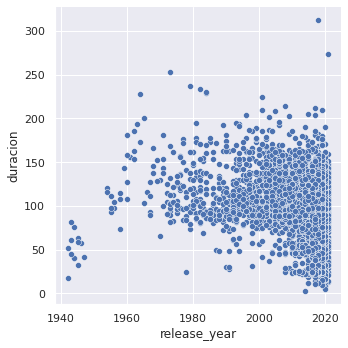

In [1681]:
sns.relplot(x='release_year', y='duracion', data=pelis)
plt.show()

In [1682]:
pelis.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duracion
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,Niños mayores de 12,90 min,Documentaries,"As her father nears the end of his life, filmm...",90


In [1683]:
outliers = tukey_outliers(pelis["duracion"])
if len(outliers):
    print(f"* duracion has these tukey outliers,\n{outliers}\n")
else:
    print(f"*duracion doesn't have any tukey outliers.\n")

* duracion has these tukey outliers,
22      161
24      166
45       23
71       13
73      182
       ... 
8746     45
8747    191
8753    171
8771    157
8785    158
Name: duracion, Length: 449, dtype: int64



In [1684]:
# Extraigo la solo el número de la duración de las películas y las guardo en otra columna
shows["temporadas"] = shows.duration.str.extract("(\d+)")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1685]:
# Covierto toda esa columna a int.
shows['temporadas']=shows['temporadas'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1686]:
shows.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,temporadas
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adultos,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2


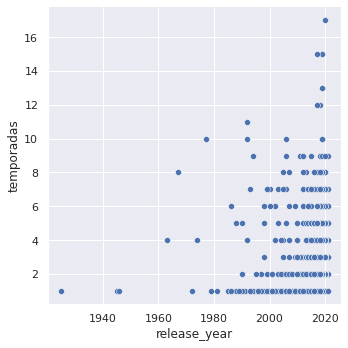

In [1687]:
sns.relplot(x='release_year', y='temporadas', data=shows)
plt.show()

In [1688]:
outliers = tukey_outliers(shows["temporadas"])
if len(outliers):
    print(f"* temporadas has these tukey outliers,\n{outliers}\n")
else:
    print(f"* temporadas doesn't have any tukey outliers.\n")

* temporadas has these tukey outliers,
8       9
15      4
21      5
55      6
65      6
       ..
8524    4
8540    7
8636    4
8693    8
8709    5
Name: temporadas, Length: 254, dtype: int64



In [1689]:
# Hay un total de 717 outlayers en release_year
# 449 en la duración de las películas
# 254 en las temporadas de los shows

In [1690]:
# Podemos probar a pasar las demás columnas a numéricas y ver la correlación que hay entre ellas

In [1691]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
netflix[[ 'country',
       'date_added', 'release_year', 'rating', 'duration']]= enc.fit_transform(netflix[['country',
       'date_added', 'release_year', 'rating', 'duration']])

In [1692]:
# Para hacer esto hay que que utilizar un encoder, en este caso utilizamos el ordinal encoder, sin embargo habría sido mejor utilizar el one-hot encoder, pero requiere una máquina muy potente

,country,date_added,release_year,rating,duration
country,1.000000,0.019649,-0.000297,-0.023220,0.070785
date_added,0.019649,1.000000,-0.000186,-0.004558,-0.002637
release_year,-0.000297,-0.000186,1.000000,-0.107201,-0.005351
rating,-0.023220,-0.004558,-0.107201,1.000000,-0.060117
duration,0.070785,-0.002637,-0.005351,-0.060117,1.000000


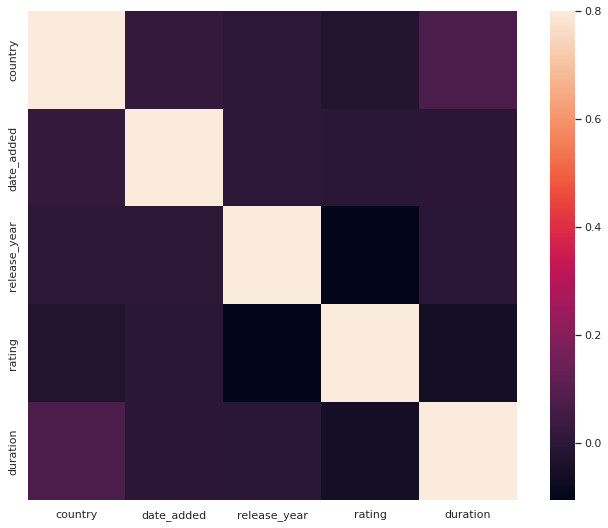

In [1693]:
corr_matrix = netflix.corr()
corr_matrix
corrmat=netflix.corr()
f, ax= plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8,square=True)

corrmat

In [1694]:
# No hay ninguna correlación que destaque

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffac14cef90>,
      dtype=object)

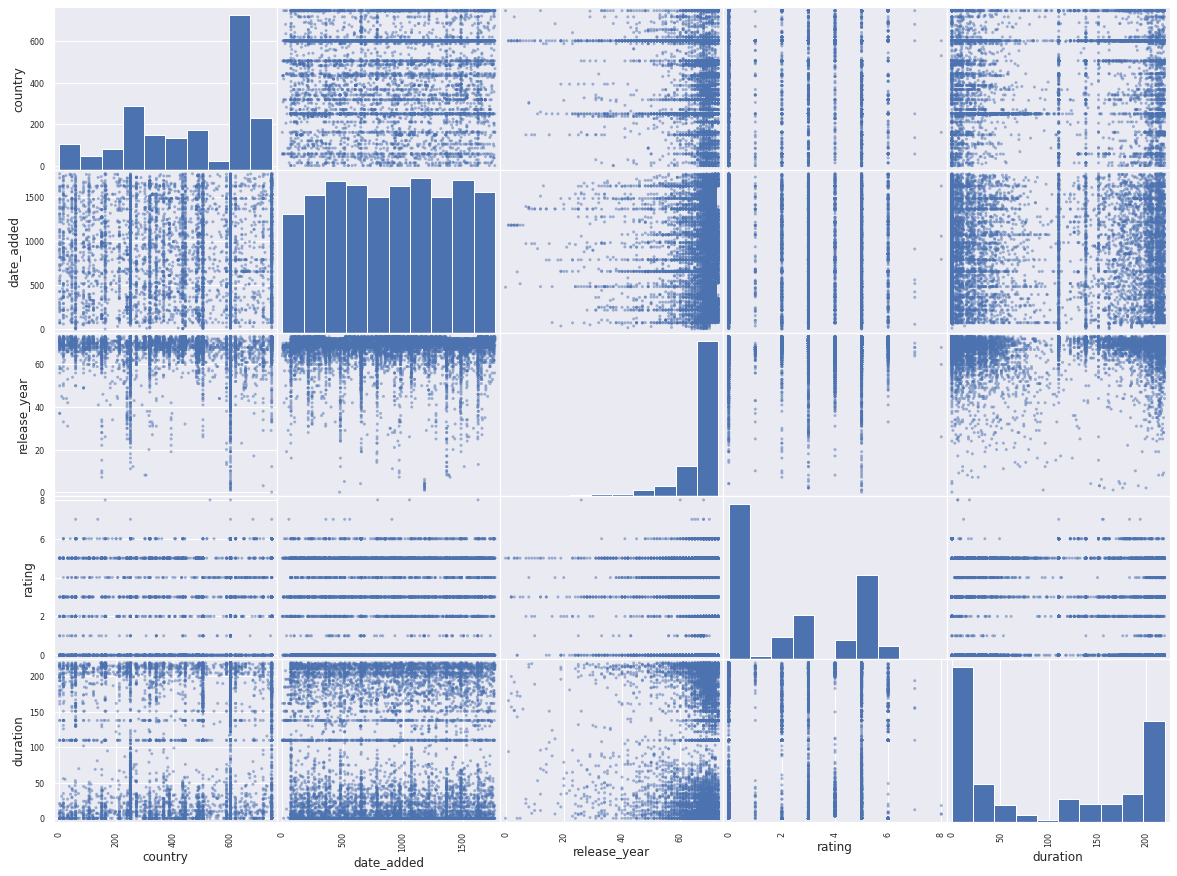

In [1695]:
from pandas.plotting import scatter_matrix
cols = ['country','date_added', 'release_year', 'rating', 'duration'] 
              
scatter_matrix(netflix[cols], figsize=(20, 15))

In [1696]:
# Podemos ver las gráficas de correlación de todas las columnas , aunque estas no nos digan mucho

In [1697]:
#CONCLUSIONES
# Netflix se convirtió en la plataforma de streaming más grande de los últimos tiempos, por no decir la más grande,
# y esto se puede ver en el aumento de su contenido a lo largo de los años y como va llegando cada vez a más y más
# países. Tmabién cabe destacar el gran número de temáticas diferentes con las que cuenta y commo van apareciendo
# más y más.